<a href="https://colab.research.google.com/github/salim-amara/melanoma/blob/main/Melanoma_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from PIL import Image
import os
from google.colab import drive

# Monter Google Drive
drive.mount('/content/drive')

#Vérifier les images corrompues
def check_image_integrity(folder_path):
    corrupted_images = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            file_path = os.path.join(folder_path, filename)
            try:
                img = Image.open(file_path)
                img.verify()  # Vérifie si l'image est valide
            except Exception as e:
                print(f"Image corrompue : {file_path} - {e}")
                corrupted_images.append(file_path)
    return corrupted_images

# Vérifier les images dans chaque dossier
folders_to_check = [
    '/content/drive/MyDrive/melanoma_data/train/images',
    '/content/drive/MyDrive/melanoma_data/valid/images',
    '/content/drive/MyDrive/melanoma_data/test/images'
]

for folder in folders_to_check:
    print(f"Vérification des images dans : {folder}")
    corrupted_images = check_image_integrity(folder)
    for img in corrupted_images:
        os.remove(img)  # Supprimer les images corrompues
        print(f"Supprimé : {img}")

Mounted at /content/drive
Vérification des images dans : /content/drive/MyDrive/melanoma_data/train/images
Vérification des images dans : /content/drive/MyDrive/melanoma_data/valid/images
Vérification des images dans : /content/drive/MyDrive/melanoma_data/test/images


In [3]:
#Verification des annotations

def check_annotations(images_folder, labels_folder):
    missing_annotations = []
    for filename in os.listdir(images_folder):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            annotation_file = os.path.splitext(filename)[0] + '.txt'
            annotation_path = os.path.join(labels_folder, annotation_file)
            if not os.path.exists(annotation_path):
                missing_annotations.append(filename)
    return missing_annotations

# Vérifier les annotations dans chaque dossier
folders_to_check = [
    ('/content/drive/MyDrive/melanoma_data/train/images', '/content/drive/MyDrive/melanoma_data/train/labels'),
    ('/content/drive/MyDrive/melanoma_data/valid/images', '/content/drive/MyDrive/melanoma_data/valid/labels'),
    ('/content/drive/MyDrive/melanoma_data/test/images', '/content/drive/MyDrive/melanoma_data/test/labels')
]

for images_folder, labels_folder in folders_to_check:
    print(f"Vérification des annotations dans : {images_folder}")
    missing_annotations = check_annotations(images_folder, labels_folder)
    if missing_annotations:
        print(f"Annotations manquantes pour les images : {missing_annotations}")
    else:
        print("Toutes les annotations sont présentes.")

Vérification des annotations dans : /content/drive/MyDrive/melanoma_data/train/images
Toutes les annotations sont présentes.
Vérification des annotations dans : /content/drive/MyDrive/melanoma_data/valid/images
Toutes les annotations sont présentes.
Vérification des annotations dans : /content/drive/MyDrive/melanoma_data/test/images
Toutes les annotations sont présentes.


In [5]:
#Verification des déséquilibres de classes
def count_classes(labels_folder):
    class_counts = {'benign': 0, 'malignant': 0}
    for filename in os.listdir(labels_folder):
        if filename.endswith('.txt'):
            file_path = os.path.join(labels_folder, filename)
            with open(file_path, 'r') as f:
                for line in f:
                    class_id = int(line.split()[0])
                    if class_id == 0:
                        class_counts['benign'] += 1
                    elif class_id == 1:
                        class_counts['malignant'] += 1
    return class_counts

# Compter les classes dans chaque dossier
folders_to_check = [
    '/content/drive/MyDrive/melanoma_data/train/labels',
    '/content/drive/MyDrive/melanoma_data/valid/labels',
    '/content/drive/MyDrive/melanoma_data/test/labels'
]

for folder in folders_to_check:
    print(f"Compter les classes dans : {folder}")
    class_counts = count_classes(folder)
    print(class_counts)

Compter les classes dans : /content/drive/MyDrive/melanoma_data/train/labels
{'benign': 498, 'malignant': 462}
Compter les classes dans : /content/drive/MyDrive/melanoma_data/valid/labels
{'benign': 92, 'malignant': 156}
Compter les classes dans : /content/drive/MyDrive/melanoma_data/test/labels
{'benign': 84, 'malignant': 41}


In [6]:
#Redimensionner les images
#target_size selon le model
def resize_images(folder_path, target_size=(800, 800)):
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            file_path = os.path.join(folder_path, filename)
            img = Image.open(file_path)
            img = img.resize(target_size)
            img.save(file_path)

# Redimensionner les images dans chaque dossier
folders_to_resize = [
    '/content/drive/MyDrive/melanoma_data/train/images',
    '/content/drive/MyDrive/melanoma_data/valid/images',
    '/content/drive/MyDrive/melanoma_data/test/images'
]

for folder in folders_to_resize:
    print(f"Redimensionnement des images dans : {folder}")
    resize_images(folder)

Redimensionnement des images dans : /content/drive/MyDrive/melanoma_data/train/images
Redimensionnement des images dans : /content/drive/MyDrive/melanoma_data/valid/images
Redimensionnement des images dans : /content/drive/MyDrive/melanoma_data/test/images



======================================== IMAGE SAMPLES ========================================


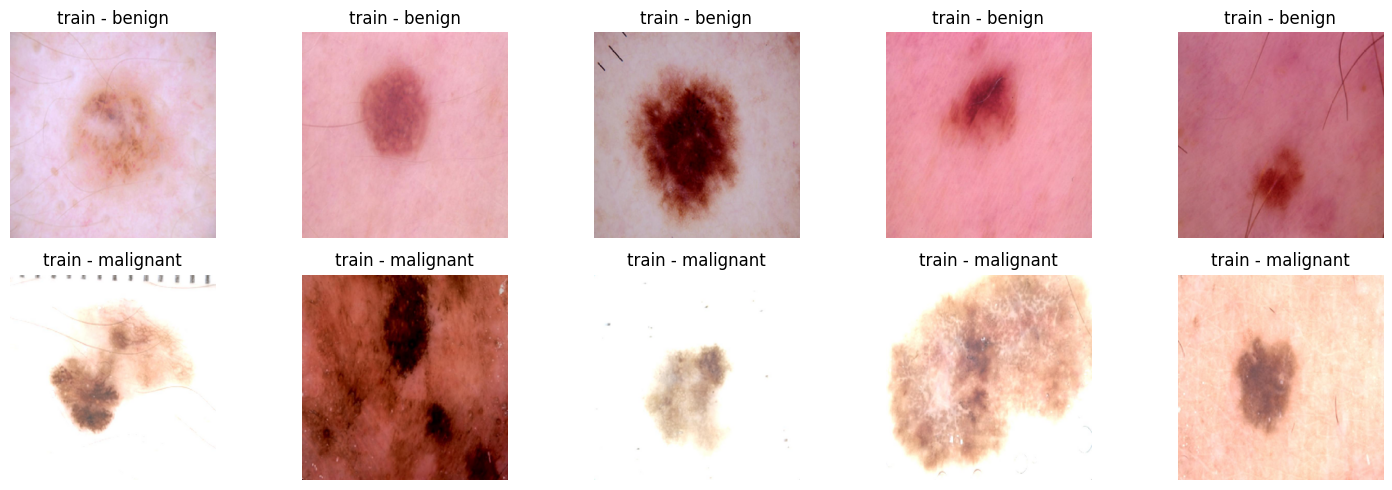

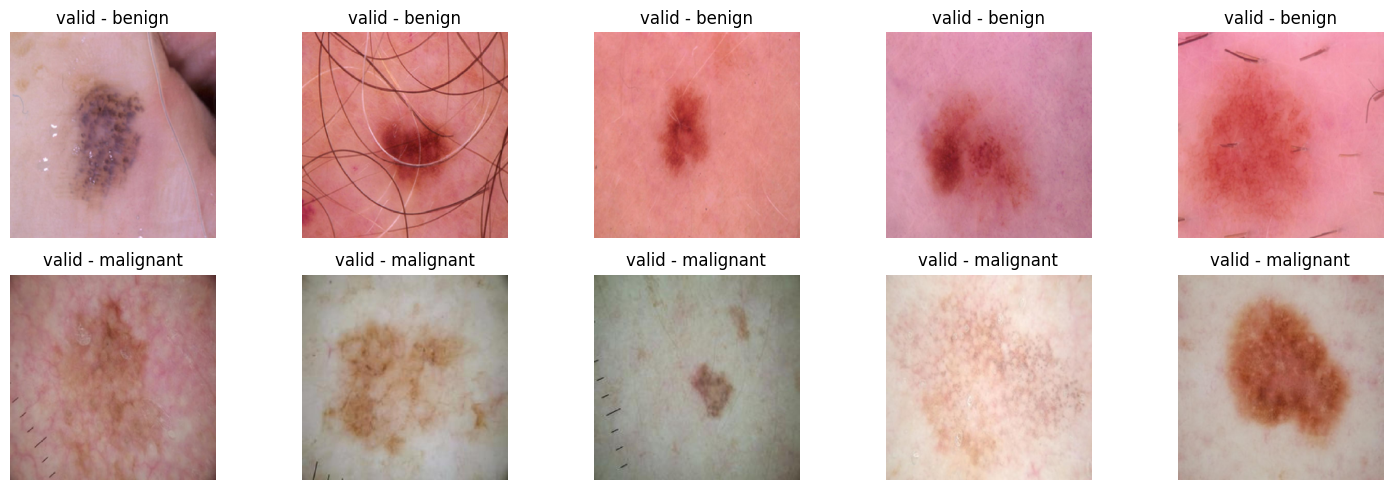

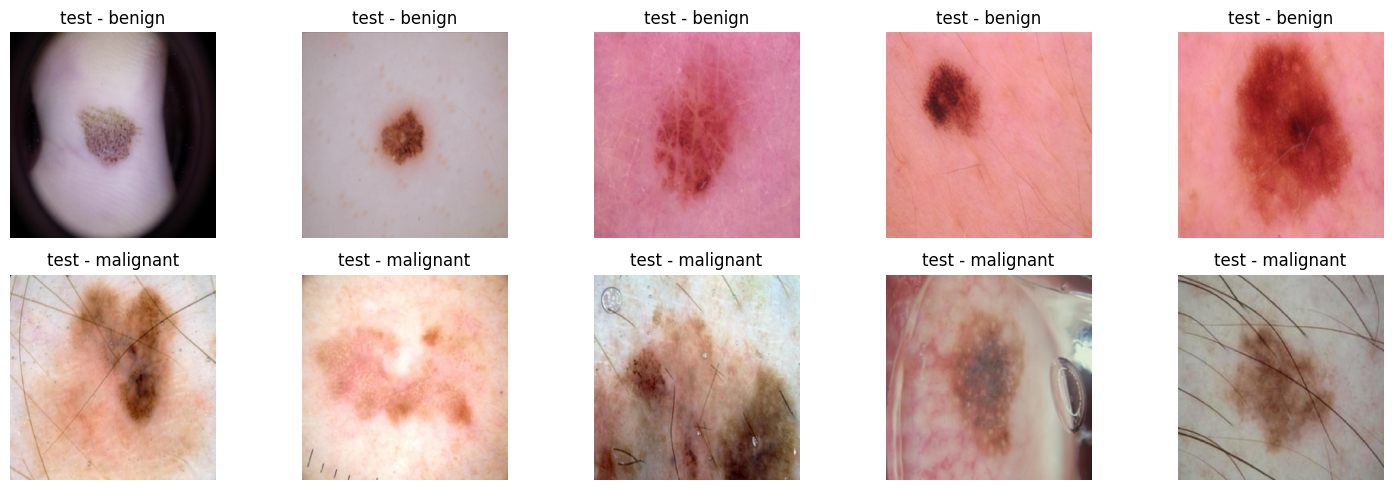


======================================== DATA DISTRIBUTION ========================================

📊 TRAIN SET ANALYSIS

Total Images: 855
Class      | Annotations
-----------------------------------
benign     | 498       
malignant  | 462       


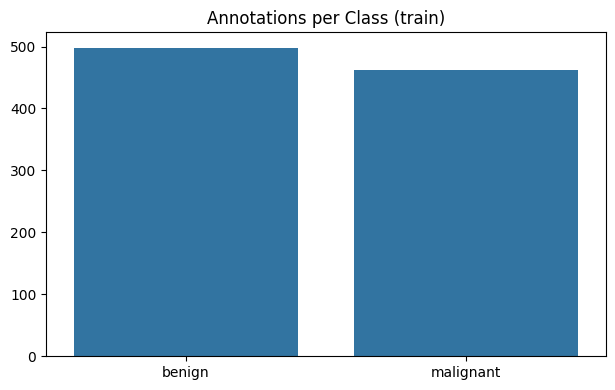


📊 VALID SET ANALYSIS

Total Images: 230
Class      | Annotations
-----------------------------------
benign     | 92        
malignant  | 156       


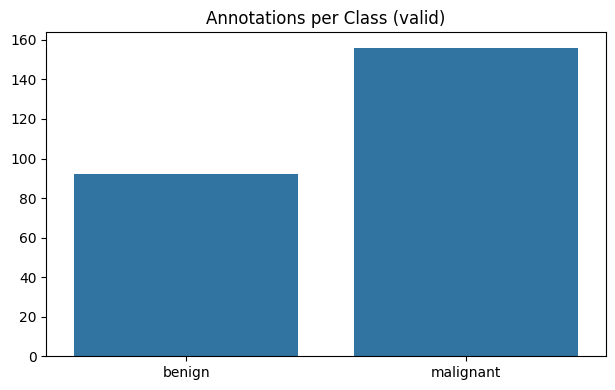


📊 TEST SET ANALYSIS

Total Images: 112
Class      | Annotations
-----------------------------------
benign     | 84        
malignant  | 41        


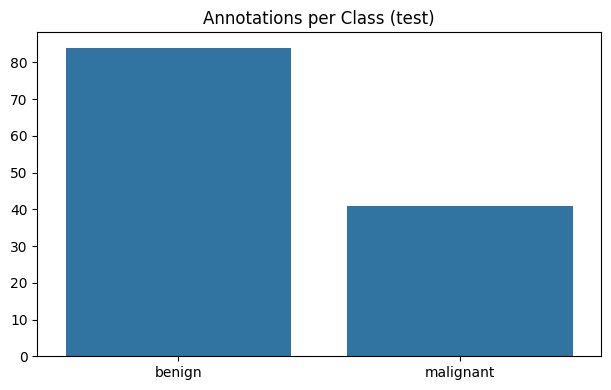


======================================== MISSING ANNOTATIONS ========================================

🔍 TRAIN - Missing annotations: 0

🔍 VALID - Missing annotations: 0

🔍 TEST - Missing annotations: 0


In [8]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import seaborn as sns

# Configuration des chemins
dataset_path = "/content/drive/MyDrive/melanoma_data"
classes = ['benign', 'malignant']
class_ids = {'benign': 0, 'malignant': 1}
splits = ['train', 'valid', 'test']

# --------------------------------------------------
# 1. Visualisation d'échantillons d'images
# --------------------------------------------------
def plot_sample_images(split, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i, class_name in enumerate(classes):
        image_dir = os.path.join(dataset_path, split, 'images')
        images = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))]

        # Filtrer par classe en utilisant les annotations
        class_images = []
        for img in images:
            label_path = os.path.join(dataset_path, split, 'labels', os.path.splitext(img)[0] + '.txt')
            if os.path.exists(label_path):
                with open(label_path, 'r') as f:
                    for line in f:
                        if int(line.split()[0]) == class_ids[class_name]:
                            class_images.append(img)
                            break

        # Afficher les échantillons
        for j in range(num_samples):
            if j < len(class_images):
                img_path = os.path.join(image_dir, class_images[j])
                img = Image.open(img_path)
                plt.subplot(2, num_samples, i*num_samples + j + 1)
                plt.imshow(img)
                plt.title(f"{split} - {class_name}")
                plt.axis('off')

    plt.tight_layout()
    plt.show()

# --------------------------------------------------
# 2. Statistiques des données
# --------------------------------------------------
def get_class_distribution(split):
    counts = {class_name: {'images': 0, 'annotations': 0} for class_name in classes}

    # Compter les images
    for class_name in classes:
        label_dir = os.path.join(dataset_path, split, 'labels')
        for label_file in os.listdir(label_dir):
            if label_file.endswith('.txt'):
                with open(os.path.join(label_dir, label_file), 'r') as f:
                    for line in f:
                        class_id = int(line.split()[0])
                        if class_id == class_ids[class_name]:
                            counts[class_name]['annotations'] += 1
                            counts[class_name]['images'] = 1  # Compte unique par image

    # Compter les images totales
    total_images = len(os.listdir(os.path.join(dataset_path, split, 'images')))
    return counts, total_images

# --------------------------------------------------
# 3. Génération du rapport
# --------------------------------------------------
def generate_cleaning_report():
    # A. Visualisation des images
    print("\n" + "="*40 + " IMAGE SAMPLES " + "="*40)
    for split in splits:
        plot_sample_images(split)

    # B. Statistiques par split
    print("\n" + "="*40 + " DATA DISTRIBUTION " + "="*40)
    for split in splits:
        print(f"\n📊 {split.upper()} SET ANALYSIS")
        class_counts, total_images = get_class_distribution(split)

        # Tableau de données
        print(f"\nTotal Images: {total_images}")
        print(f"{'Class':<10} | {'Annotations':<10}")
        print("-"*35)
        for class_name in classes:
            print(f"{class_name:<10} | {class_counts[class_name]['annotations']:<10}")

        # Visualisation
        plt.figure(figsize=(12, 4))

        # Annotations par classe
        plt.subplot(1, 2, 2)
        sns.barplot(x=classes,
                    y=[class_counts[class_name]['annotations'] for class_name in classes])
        plt.title(f'Annotations per Class ({split})')

        plt.tight_layout()
        plt.show()

    # C. Vérification des annotations manquantes
    print("\n" + "="*40 + " MISSING ANNOTATIONS " + "="*40)
    for split in splits:
        image_dir = os.path.join(dataset_path, split, 'images')
        label_dir = os.path.join(dataset_path, split, 'labels')

        missing = []
        for img in os.listdir(image_dir):
            label_path = os.path.join(label_dir, os.path.splitext(img)[0] + '.txt')
            if not os.path.exists(label_path):
                missing.append(img)

        print(f"\n🔍 {split.upper()} - Missing annotations: {len(missing)}")
        if len(missing) > 0:
            print("First 5 missing:", missing[:5])

# --------------------------------------------------
# Exécution du rapport
# --------------------------------------------------
generate_cleaning_report()